# 🚀 ELEVVO Internship Task
#### 👤 Author: Ali Muhammed
#### 🧠 Task Level: 1
#### 🚀 Task Number: 2

## 🎬 Importing the tools and library

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import xgboost as xgb

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## 📂 Loading the data

In [2]:
train_data = pd.read_csv('train.csv', header=0, names=['classid', 'title', 'description'])
test_data = pd.read_csv('test.csv', header=0, names=['classid', 'title', 'description'])

In [3]:
train_data.head()

,classid,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
print(train_data.count(), "\n")
print(test_data.count())

classid        120000
title          120000
description    120000
dtype: int64 

classid        7600
title          7600
description    7600
dtype: int64


## 🔀 Splitting the data (train and test)

In [5]:
train_d = train_data[:60000]
x_train = train_d.description
y_train = train_d.classid

test_d = test_data.copy() 
x_test = test_d.description
y_test = test_d.classid

## 🛑 Loading the stop words

In [6]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'from', 'didn', 'their', 'he', 'but', 'be', 'than', 'all', "won't", "you've", 'own', 'no', 'him', 'after', 'about', 'of', 'up', "you're", 'the', 'ma', 'll', 'ourselves', "they've", "that'll", "i'm", "she'd", 'is', 'who', 'me', 'your', 'or', 'whom', "i'll", 'her', 'was', 've', 'any', 'weren', "couldn't", "weren't", "wouldn't", "they're", 'did', "hasn't", 'itself', 'not', 'they', 'so', 'has', 'because', 'too', 'off', 'once', 'needn', "shouldn't", 'them', 'don', 'mightn', 'aren', "it'll", 'do', 's', 'here', 'most', 'does', 'will', 'on', 'few', "shan't", "i've", 'my', 're', 'were', "you'll", "i'd", 'just', 'i', 'which', 'ain', 'by', 'and', 'you', 'myself', 'to', "he'll", 'mustn', 'an', 'ours', 'we', 'nor', 'those', "didn't", 'very', 'such', 'our', 't', 'can', 'been', 'for', 'isn', "he'd", "doesn't", 'his', "she'll", 'why', 'won', 'yours', 'its', "needn't", "aren't", 'if', 'hasn', 'haven', 'other', "you'd", 'as', 'are', 'over', 'again', "wasn't", 'yourself', "we'd", "they'd", 'doing', 'abo

## 🧹 Preprocessing the data

In [7]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    updated_tag = []
    for i in range(len(tag)):        
        temp = tag[i][1]
        if temp.startswith('J'):
            temp = wordnet.ADJ
        elif temp.startswith('V'):
            temp = wordnet.VERB
        elif temp.startswith('N'):
            temp = wordnet.NOUN
        elif temp.startswith('R'):
            temp = wordnet.ADV
        else:
            temp = wordnet.NOUN
        updated_tag.append([tag[i][0],temp])
    return updated_tag

'''def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'\\"\\n""', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    
    return " ".join(lemmatizer.lemmatize(i) for i in tokens if i not in stop_words)'''


def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'\\"\\n""', ' ', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    postag = pos_tag(tokens)
    tags = get_wordnet_pos(postag)
    
    return " ".join(lemmatizer.lemmatize(i, pos=tag) for i, tag in tags if i not in stop_words)


x_train = x_train.apply(preprocess)
x_test = x_test.apply(preprocess)

In [8]:
print("Before :\n", train_data['description'][1], "\n")
print("After :\n", x_train[1])

Before :
 Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market. 

After :
 reuters private investment firm carlyle group reputation make well time occasionally controversial play defense industry quietly place bet another part market


## 📈 Evaluating the importance of a word (using TF-IDF)

In [9]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

## 🤖 Making the Logistic Regression (Classification) model

In [10]:
model1 = LogisticRegression()
model1.fit(x_train_tfidf, y_train)
y_pred1 = model1.predict(x_test_tfidf)

print("Accuracy :",accuracy_score(y_test, y_pred1))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred1))
print("Classification Report :\n",classification_report(y_test, y_pred1))

Accuracy : 0.8923684210526316
Confusion Matrix :
 [[1684   62   80   74]
 [  32 1842    9   17]
 [  89   26 1572  213]
 [  55   27  134 1684]]
Classification Report :
               precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.94      0.97      0.96      1900
           3       0.88      0.83      0.85      1900
           4       0.85      0.89      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



## 🤖 Making the Random Forest (Classification) model

In [11]:
model2 = RandomForestClassifier()
model2.fit(x_train_tfidf, y_train)
y_pred2 = model2.predict(x_test_tfidf)

print("Accuracy :",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Classification Report :\n",classification_report(y_test, y_pred2))

Accuracy : 0.8690789473684211
Confusion Matrix :
 [[1650   90   79   81]
 [  40 1816   17   27]
 [  81   50 1521  248]
 [  77   66  139 1618]]
Classification Report :
               precision    recall  f1-score   support

           1       0.89      0.87      0.88      1900
           2       0.90      0.96      0.93      1900
           3       0.87      0.80      0.83      1900
           4       0.82      0.85      0.84      1900

    accuracy                           0.87      7600
   macro avg       0.87      0.87      0.87      7600
weighted avg       0.87      0.87      0.87      7600



## 🤖 Making the Naive Bayes (Classification) model

In [ ]:
model3 = MultinomialNB()
model3.fit(x_train_tfidf, y_train)
y_pred3 = model3.predict(x_test_tfidf)

print("Accuracy :",accuracy_score(y_test, y_pred3))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred3))
print("Classification Report :\n",classification_report(y_test, y_pred3))

Accuracy : 0.8857894736842106
Confusion Matrix :
 [[1688   62   96   54]
 [  44 1823   12   21]
 [  83   18 1567  232]
 [  79   23  144 1654]]
Classification Report :
               precision    recall  f1-score   support

           1       0.89      0.89      0.89      1900
           2       0.95      0.96      0.95      1900
           3       0.86      0.82      0.84      1900
           4       0.84      0.87      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



## 🤖 Making the XGBoost (Classification) model

In [13]:
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

model4 = xgb.XGBClassifier()
model4.fit(x_train_tfidf, y_train_xgb)
y_pred4 = model4.predict(x_test_tfidf)

print("Accuracy :",accuracy_score(y_test_xgb, y_pred4))
print("Confusion Matrix :\n",confusion_matrix(y_test_xgb, y_pred4))
print("Classification Report :\n",classification_report(y_test_xgb, y_pred4))

Accuracy : 0.8631578947368421
Confusion Matrix :
 [[1643   85   72  100]
 [  57 1770   26   47]
 [  95   32 1533  240]
 [  83   48  155 1614]]
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1900
           1       0.91      0.93      0.92      1900
           2       0.86      0.81      0.83      1900
           3       0.81      0.85      0.83      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



## 🧹 Preprocessing the data again to fit the neural network

In [14]:
y_train_encoder = LabelEncoder()
y_test_encoder = LabelEncoder()

y_train_enc = y_train_encoder.fit_transform(y_train_xgb)
y_test_enc = y_test_encoder.fit_transform(y_test_xgb)

y_train_enc = y_train_enc.reshape(len(y_train_enc), 1)
y_test_enc = y_test_enc.reshape(len(y_test_enc), 1)

y_train_nn = OneHotEncoder(sparse_output=False)
y_train_nn = y_train_nn.fit_transform(y_train_enc)

y_test_nn = OneHotEncoder(sparse_output=False)
y_test_nn = y_test_nn.fit_transform(y_test_enc)

## 🧠 Building the neural network

In [15]:
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_tfidf.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_nn.summary()

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     4,582,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,592,740 (17.52 MB)

 Trainable params: 4,592,740 (17.52 MB)

 Non-trainable params: 0 (0.00 B)

## 🏋️‍♂️ Training the neural network (Classification) model

In [16]:
model_nn.fit(x_train_tfidf.toarray(), y_train_nn, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.8172 - loss: 0.5107 - val_accuracy: 0.8798 - val_loss: 0.3389
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9447 - loss: 0.1541 - val_accuracy: 0.8780 - val_loss: 0.3807
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9713 - loss: 0.0773 - val_accuracy: 0.8668 - val_loss: 0.4996
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9825 - loss: 0.0463 - val_accuracy: 0.8663 - val_loss: 0.6531
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9872 - loss: 0.0300 - val_accuracy: 0.8655 - val_loss: 0.7069
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9906 - loss: 0.0222 - val_accuracy: 0.8573 - val_loss: 0.7820
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 52s 31ms/step - accuracy: 0.9915 - loss: 0.0195 - val_accuracy: 0.8597 - val_loss: 0.8905
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9927 -

## 🔍 Testing the neural network (Classification) model

In [17]:
loss, accuracy = model_nn.evaluate(x_test_tfidf.toarray(), y_test_nn)
print("Test accuracy:", accuracy)
print("Test loss:", loss)

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8839 - loss: 0.7522
Test accuracy: 0.8673684000968933
Test loss: 0.8417778611183167


## 📊 Visualizing the most common words

In [18]:
world_news = x_train[y_train[y_train == 1].index]
sports_news = x_train[y_train[y_train == 2].index]
business_news = x_train[y_train[y_train == 3].index]
science_technology_news = x_train[y_train[y_train == 4].index]

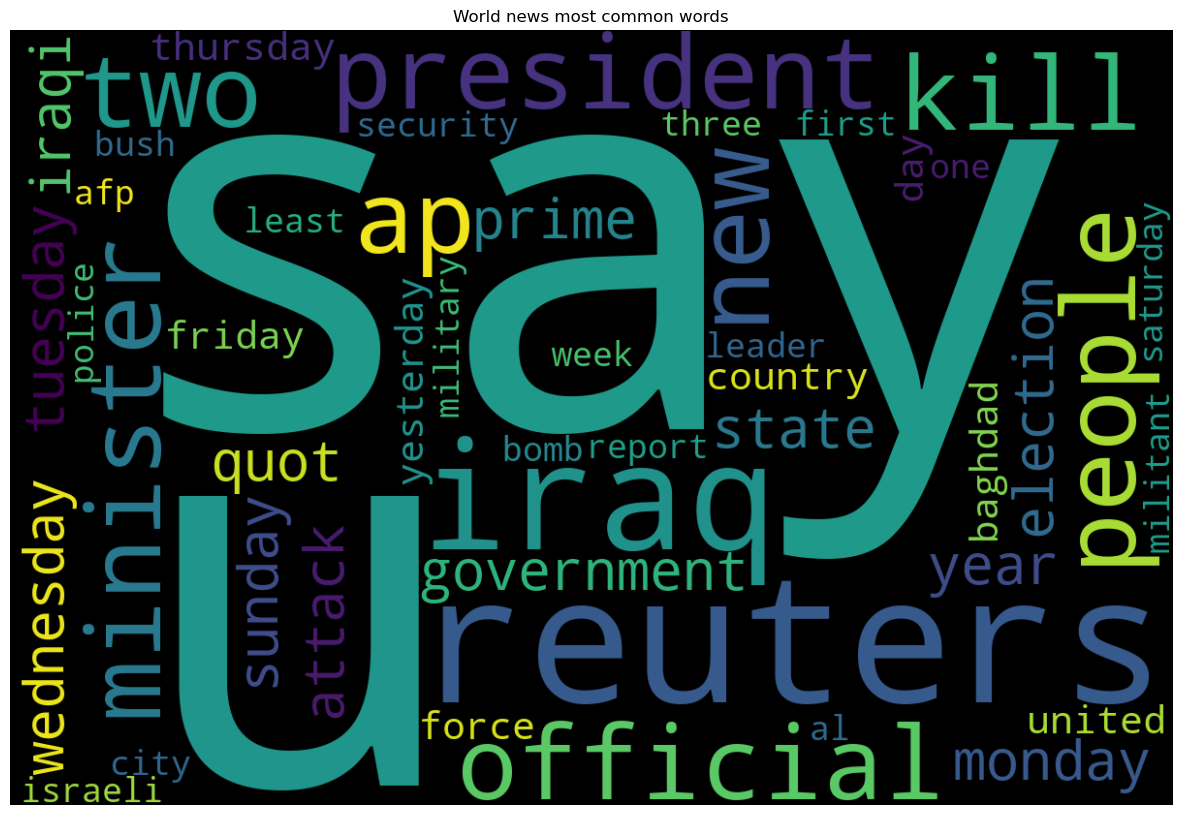

In [19]:
world_news = " ".join(world_news).split()
world_news = Counter(world_news).most_common(50)
world_news_words = []
for word in world_news:
    world_news_words.append(word[0])

plt.figure(figsize=(15, 15))
wordcloud1 = WordCloud(min_font_size = 3, width = 1200 , height = 800, background_color='black').generate(" ".join(world_news_words))
plt.axis('off')
plt.title('World news most common words')
plt.imshow(wordcloud1, interpolation="Bilinear")

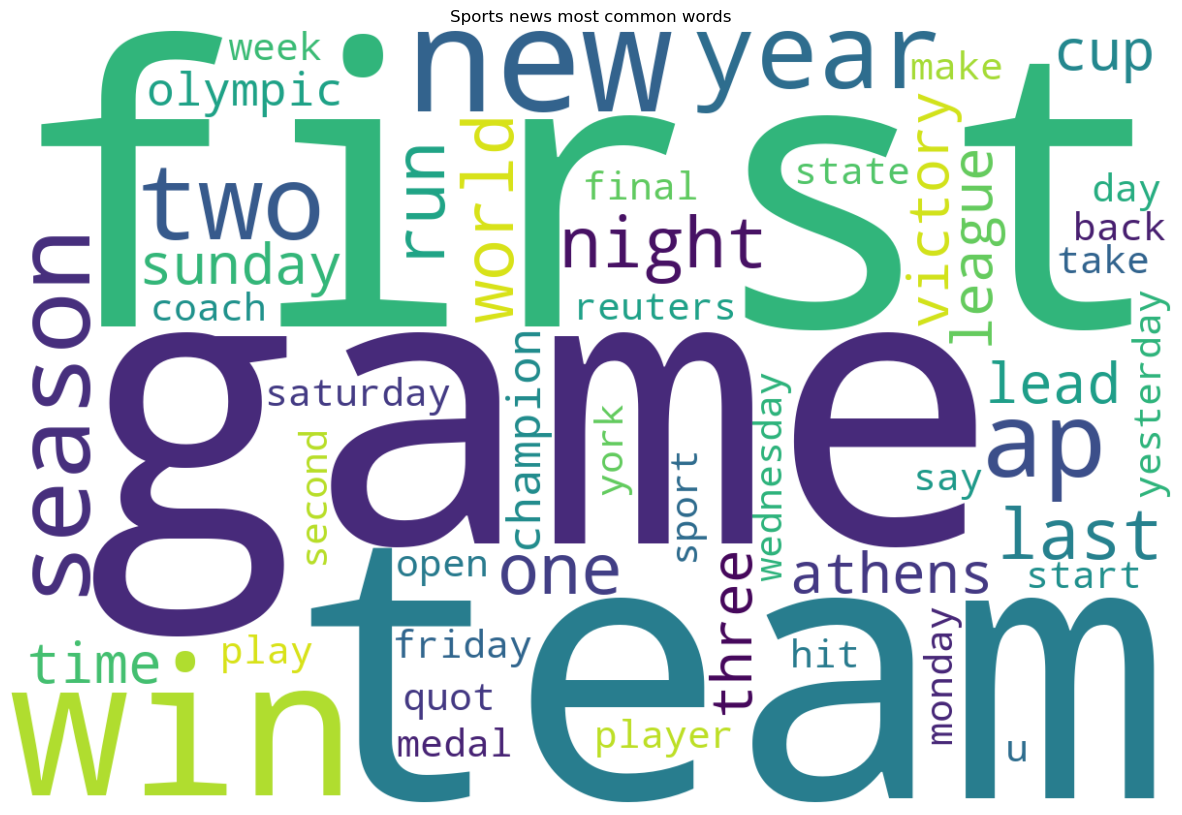

In [20]:
sports_news = " ".join(sports_news).split()
sports_news = Counter(sports_news).most_common(50)
sports_news_words = []
for word in sports_news:
    sports_news_words.append(word[0])

plt.figure(figsize=(15, 15))
wordcloud2 = WordCloud(min_font_size = 3, width = 1200 , height = 800, background_color='white').generate(" ".join(sports_news_words))
plt.axis('off')
plt.title('Sports news most common words')
plt.imshow(wordcloud2, interpolation="Bilinear")

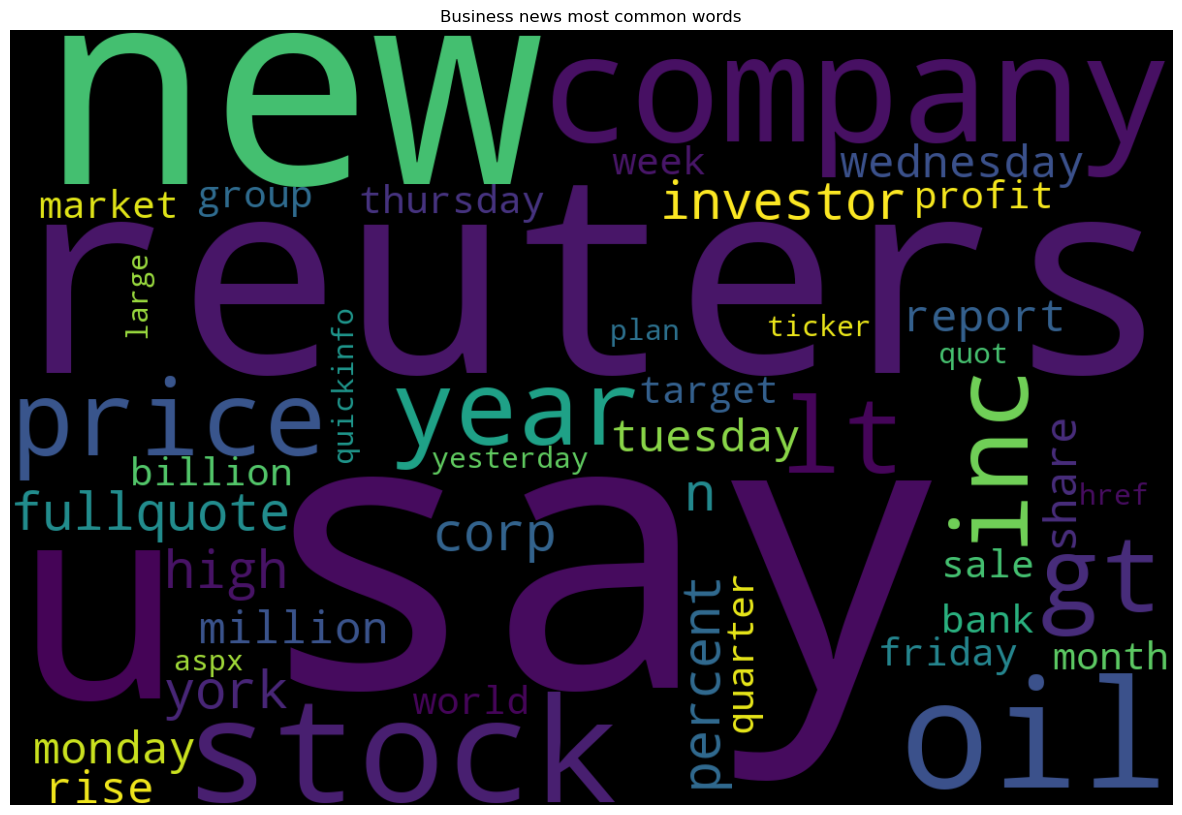

In [21]:
business_news = " ".join(business_news).split()
business_news = Counter(business_news).most_common(50)
business_news_words = []
for word in business_news:
    business_news_words.append(word[0])

plt.figure(figsize=(15, 15))
wordcloud3 = WordCloud(min_font_size = 3, width = 1200 , height = 800, background_color='black').generate(" ".join(business_news_words))
plt.axis('off')
plt.title('Business news most common words')
plt.imshow(wordcloud3, interpolation="Bilinear")

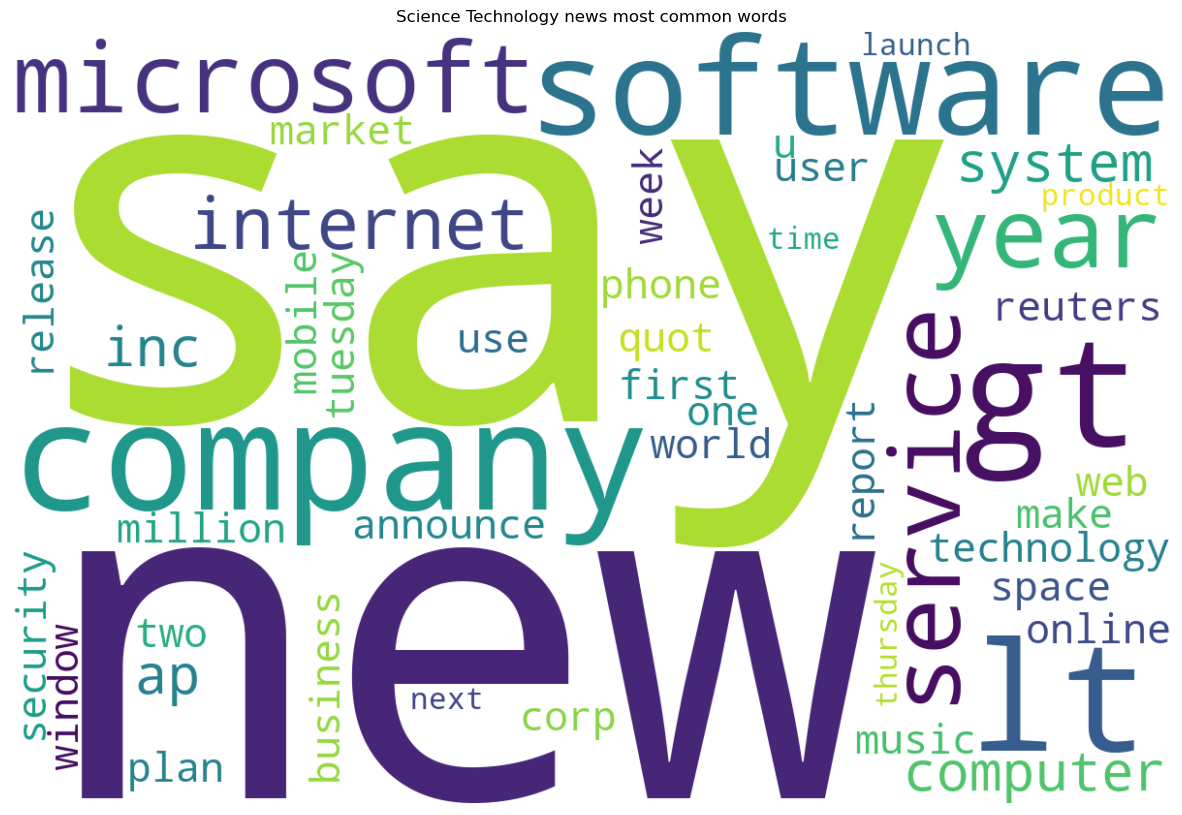

In [22]:
science_technology_news = " ".join(science_technology_news).split()
science_technology_news = Counter(science_technology_news).most_common(50)
science_technology_news_words = []
for word in science_technology_news:
    science_technology_news_words.append(word[0])

plt.figure(figsize=(15, 15))
wordcloud4 = WordCloud(min_font_size = 3, width = 1200 , height = 800, background_color='white').generate(" ".join(science_technology_news_words))
plt.axis('off')
plt.title('Science Technology news most common words')
plt.imshow(wordcloud4, interpolation="Bilinear")

## 👤 Accounts
### [Linkedin](https://www.linkedin.com/in/ali-muhammed-salah/) [Kaggle](https://www.kaggle.com/alimuhammed10) [GitHub](https://github.com/ali-muhammed-salah)